<a href="https://colab.research.google.com/github/ena2509/Gripsept21task3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Sparks Foundation -GRIPSeptember21

  #Task 6:Prediction using Decision Tree Algorithm

Problem Statement: Create the Decision Tree classifier and visualize it graphically .

BY: ANEENA ANN SUNIL

In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


###Downloading the data

In [3]:
iris_df=pd.read_csv('Iris.csv')
print('Data imported successfully')

Data imported successfully


In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


###Data Exploration & Visualisation

Since the column 'Id' is not important for the prediction, Let's drop it.

In [5]:
raw_df=iris_df.drop('Id',1)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
raw_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
raw_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


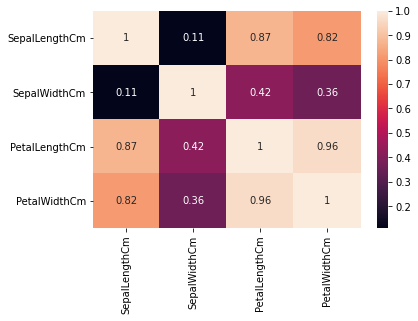

In [9]:
sns.heatmap(abs(raw_df.corr()),annot=True)

PetalLenghth & PetalWidth
 has a strong correlation of 0.96

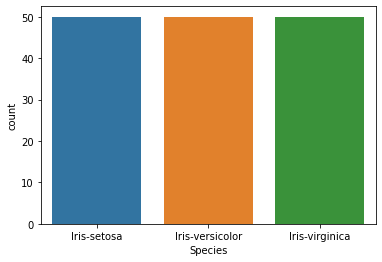

In [10]:
sns.countplot(raw_df['Species']);

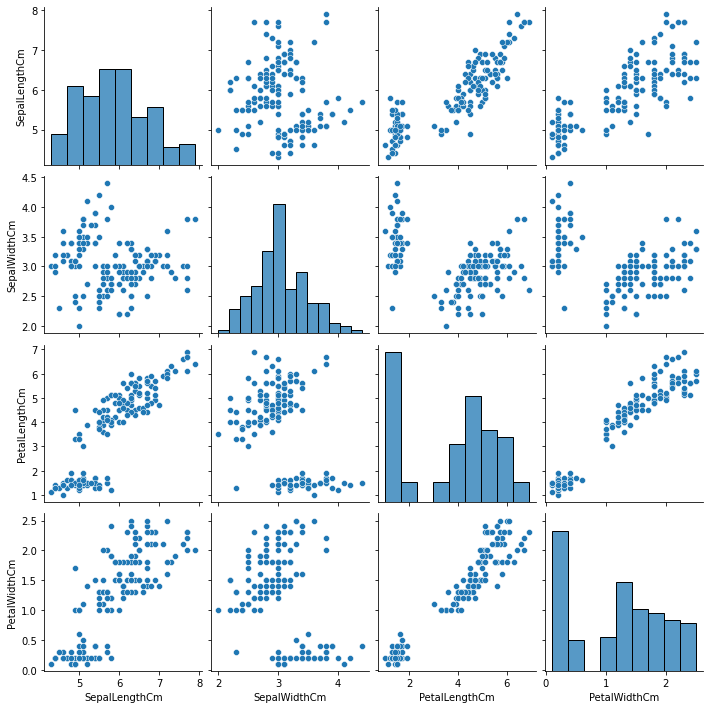

In [11]:

sns.pairplot(raw_df)

###Preparing the Data for Training

In [12]:
# Checking for null values
raw_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataset. Now, let's identify the inputs & target columns.

In [13]:
input_cols=list(raw_df.iloc[:, :-1])
target_col='Species'

In [14]:
print(list(input_cols))

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [15]:
print(target_col)

Species


Now that we've identified the input and target columns, we can separate input & target data.

In [16]:
inputs_df=raw_df[input_cols].copy()

In [17]:
inputs_df.shape

(150, 4)

In [18]:
targets=raw_df[target_col]
targets.shape

(150,)

Let's split the data into train and test set.

In [19]:
#splitting the train and test dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_df, targets,test_size=0.2, random_state=42)
print('Shape of x_train is ~',x_train.shape)
print('shape of y_train is  ~',y_train.shape)
print('Shape of x_test is ~',x_test.shape)
print('shape of y_test is  ~',y_test.shape)

Shape of x_train is ~ (120, 4)
shape of y_train is  ~ (120,)
Shape of x_test is ~ (30, 4)
shape of y_test is  ~ (30,)


Scaling values to a (0,1) range using MinMaxScaler from sklearn.preprocessing.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Create the scaler
scaler=MinMaxScaler()

In [22]:

# Fit the scaler to the numeric columns
scaler.fit(inputs_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
 #Transform and replace the numeric columns
inputs_df=scaler.transform(inputs_df)

After scaling, the ranges of columns should be (0,1)

In [24]:
scaled_df=pd.DataFrame(inputs_df,columns=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [25]:
scaled_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [26]:
scaled_df.describe().loc[['min','max']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


###Training and Visualizing Decision Trees¶


We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model=DecisionTreeClassifier(random_state=42)

In [29]:
%%time
model.fit(x_train, y_train)

CPU times: user 2.25 ms, sys: 1.12 ms, total: 3.37 ms
Wall time: 6.07 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [30]:
y_pred=model.predict(x_test)

An optimal decision tree has now been created using the training data

###Evaluation

In [31]:
from sklearn.metrics import accuracy_score,classification_report
print('Classification Report:\n',classification_report(y_test,y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [32]:
model.score(x_test, y_test)

1.0

The accuracy of the model is 100%.

###Visualization of Decision Tree

We can visualize the decision tree learned from the training data

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

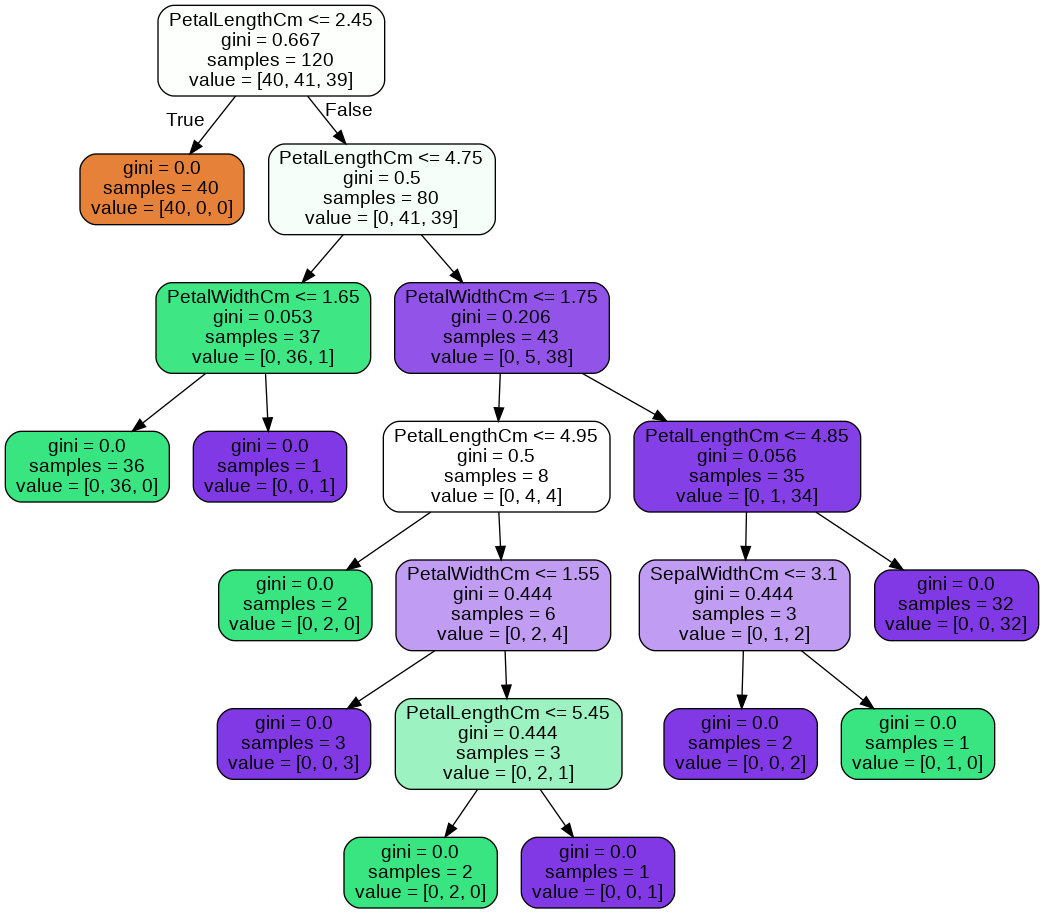

In [34]:
dot_data=StringIO()
export_graphviz(model, out_file=dot_data,
               filled=True, rounded=True,
               feature_names=input_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Hence a model is created to predict the class and decision Tree visualized.

Thankyou!!